In [5]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from astropy import units as u
from astropy.coordinates import SkyCoord, EarthLocation
from astropy.io import fits
from spectral_cube import SpectralCube
from spectral_cube import BooleanArrayMask
from astropy.convolution import Gaussian1DKernel, convolve
import aplpy  
from astropy.wcs import WCS
from reproject import reproject_interp
from astroquery.vizier import Vizier
from astroquery.skyview import SkyView
from astropy.time import Time
import pandas as pd

Vizier.ROW_LIMIT = -1

mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.size'] = '16'
mpl.rcParams['xtick.direction'] = 'in'
mpl.rcParams['ytick.direction'] = 'in'
%matplotlib inline

In [3]:
gass = fits.open('/Users/denes/Research/high_lat_HI/GAS_data/gass_158_-28_Hydra_mom0.fits')  # Open the FITS file for reading
d = gass[0].data
h = gass[0].header

In [11]:
d.shape

(1, 87, 187)

In [6]:
# read in ASKAP catalogue

data_1 = pd.read_csv('/Users/denes/Research/high_lat_HI/ASKAP_data/continuum_cat/AS102_Continuum_Island_Catalogue_10609_119.csv')
data_2 = pd.read_csv('/Users/denes/Research/high_lat_HI/ASKAP_data/continuum_cat/AS102_Continuum_Island_Catalogue_10612_123.csv')

df_1 = pd.DataFrame(data_1)
df_2 = pd.DataFrame(data_2)

# concatenate catalogues
df = pd.concat([df_1, df_2])

In [16]:
sources = df[df['flux_peak']>50]
print(len(sources))
ra = np.array(sources['ra_hms_cont'])
dec = np.array(sources['dec_dms_cont'])

196


In [27]:
sources_5sig = pd.read_csv('./5_sigma_askap_sources.csv')
ra_5s = np.array(sources_5sig['ra_hms_cont'])
dec_5s = np.array(sources_5sig['dec_dms_cont'])

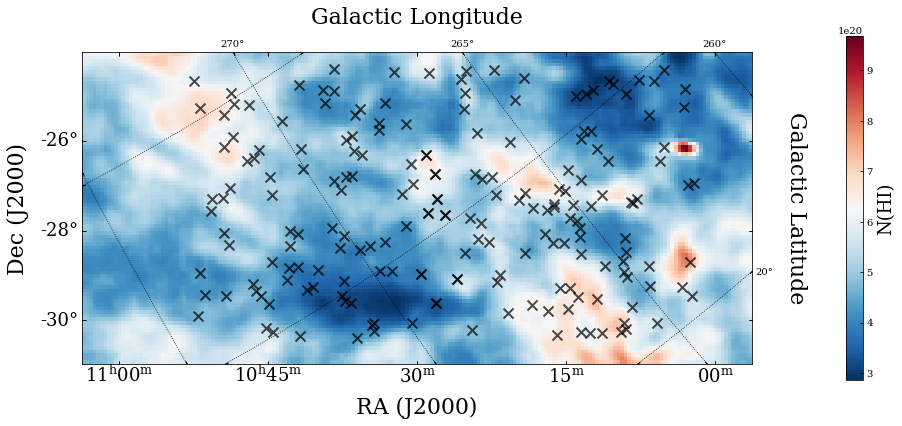

In [25]:
# make fancy HI overlay plots

# read in HI data
hi_data = fits.open('/Users/denes/Research/high_lat_HI/GAS_data/gass_158_-28_Hydra_mom0.fits')  # Open the FITS file for reading
d = hi_data[0].data
h = hi_data[0].header
d = d[0,:,:]
del h['*3']
h['NAXIS'] = 2
c = 1.823 * 10**18
nhi = c*d

#co_reprojected, footprint = reproject_interp(co_data[1], h)

# select continuum sources to plot

atca_sources = ['10:28:09.68 -26:44:18.9', '10:19:08.52 -27:08:56.5', '10:22:29.45 -26:47:34.3']

# plot figure
fig = plt.figure(figsize=(14, 7))
ax = fig.add_subplot(111, projection=WCS(h))

# Display the moment map image
im = ax.imshow(nhi, cmap='RdBu_r')
#ax.contour(co_reprojected, levels=[0.4, 0.8], cmap='Blues_r', alpha=0.7)

x_lim = ax.get_xlim()
y_lim = ax.get_ylim()

for i in range(0, len(ra)):
    coord = '{} {}'.format(ra[i], dec[i])
    c_0 = SkyCoord(coord, unit=(u.hourangle, u.deg))
    ax.scatter(c_0.ra, c_0.dec, transform=ax.get_transform('fk5'), marker='x', s=100, edgecolor='k', linewidth=2, facecolor='k', alpha=0.7)


#for j in range(0, len(atca_sources)):
    #c3 = SkyCoord(atca_sources[j], unit=(u.hourangle, u.deg))
    #ax.scatter(c3.ra, c3.dec, transform=ax.get_transform('fk5'), marker='<', s=100, edgecolor='k', linewidth=2, facecolor='none')
    #ax.text(c3.ra.value, c3.dec.value, transform=ax.get_transform('fk5'),s=sources[j],fontsize=10)


#ax.set_title('Hydra', fontsize=22)
ax.tick_params(axis='both', which='major', labelsize=18)
ax.coords['ra'].set_axislabel('RA (J2000)', fontsize=22)
ax.coords['dec'].set_axislabel('Dec (J2000)', fontsize=22)
cbar_hi = plt.colorbar(im, orientation='vertical', fraction=0.022, pad=0.12)
cbar_hi.set_label('N(HI)', size=18)

overlay = ax.get_coords_overlay('galactic')
overlay.grid(color='k', ls='dotted')
overlay[0].set_axislabel('Galactic Longitude', fontsize=22)
overlay[1].set_axislabel('Galactic Latitude', fontsize=22)

ax.set_xlim(x_lim)
ax.set_ylim(y_lim)

#plt.colorbar(im)
fig.savefig('Hydra_ASKAP_continuum_sources.png',dpi=200)

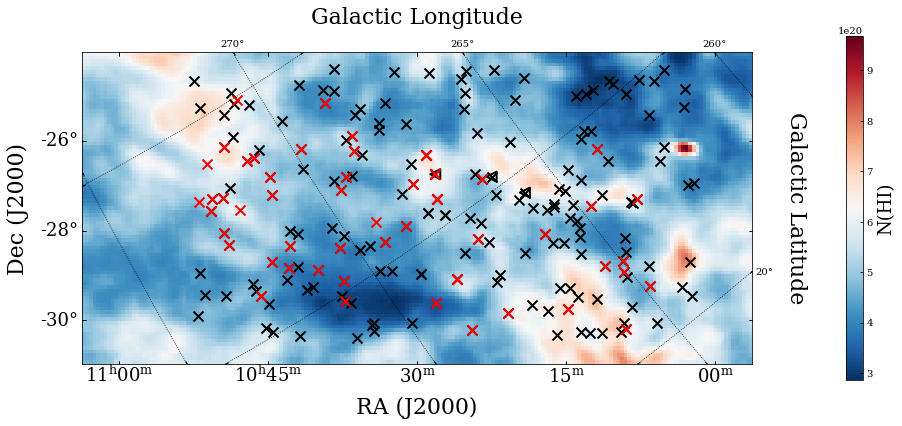

In [28]:
# plot figure
fig = plt.figure(figsize=(14, 7))
ax = fig.add_subplot(111, projection=WCS(h))

# Display the moment map image
im = ax.imshow(nhi, cmap='RdBu_r')
#ax.contour(co_reprojected, levels=[0.4, 0.8], cmap='Blues_r', alpha=0.7)

x_lim = ax.get_xlim()
y_lim = ax.get_ylim()

for i in range(0, len(ra)):
    coord = '{} {}'.format(ra[i], dec[i])
    c_0 = SkyCoord(coord, unit=(u.hourangle, u.deg))
    ax.scatter(c_0.ra, c_0.dec, transform=ax.get_transform('fk5'), marker='x', s=100, edgecolor='k', linewidth=2, facecolor='k')

for j in range(0, len(atca_sources)):
    c3 = SkyCoord(atca_sources[j], unit=(u.hourangle, u.deg))
    ax.scatter(c3.ra, c3.dec, transform=ax.get_transform('fk5'), marker='<', s=100, edgecolor='k', linewidth=2, facecolor='none')
    #ax.text(c3.ra.value, c3.dec.value, transform=ax.get_transform('fk5'),s=sources[j],fontsize=10)

for i in range(0, len(ra_5s)):
    coord = '{} {}'.format(ra_5s[i], dec_5s[i])
    c_1 = SkyCoord(coord, unit=(u.hourangle, u.deg))
    ax.scatter(c_1.ra, c_1.dec, transform=ax.get_transform('fk5'), marker='x', s=100, edgecolor='r', linewidth=2, facecolor='r')

#ax.set_title('Hydra', fontsize=22)
ax.tick_params(axis='both', which='major', labelsize=18)
ax.coords['ra'].set_axislabel('RA (J2000)', fontsize=22)
ax.coords['dec'].set_axislabel('Dec (J2000)', fontsize=22)
cbar_hi = plt.colorbar(im, orientation='vertical', fraction=0.022, pad=0.12)
cbar_hi.set_label('N(HI)', size=18)

overlay = ax.get_coords_overlay('galactic')
overlay.grid(color='k', ls='dotted')
overlay[0].set_axislabel('Galactic Longitude', fontsize=22)
overlay[1].set_axislabel('Galactic Latitude', fontsize=22)

ax.set_xlim(x_lim)
ax.set_ylim(y_lim)

#plt.colorbar(im)
fig.savefig('Hydra_ASKAP_continuum_sources_5sigma.png',dpi=200)

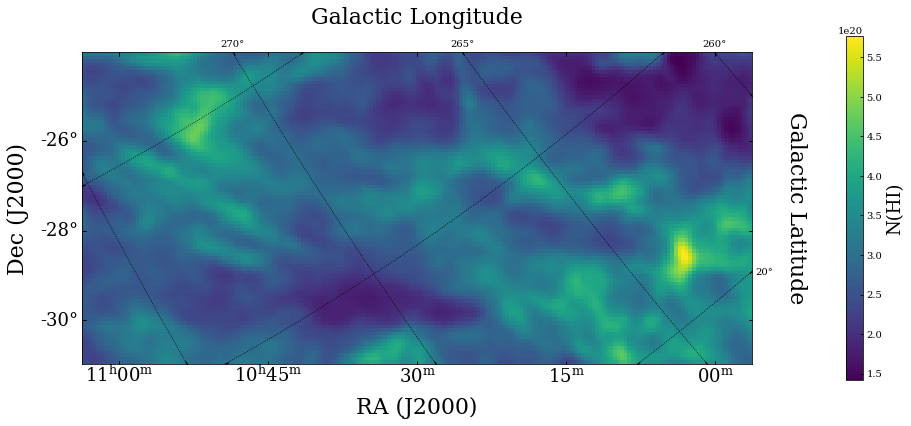

In [30]:
# read in HI data
hi_data = fits.open('/Users/denes/Research/high_lat_HI/GAS_data/gass_158_-28_Hydra_10-10mom0.fits')  # Open the FITS file for reading
d = hi_data[0].data
h = hi_data[0].header
d = d[0,:,:]
del h['*3']
h['NAXIS'] = 2
c = 1.823 * 10**18
nhi = c*d

# plot figure
fig = plt.figure(figsize=(14, 7))
ax = fig.add_subplot(111, projection=WCS(h))

# Display the moment map image
im = ax.imshow(nhi, cmap='viridis')
#ax.contour(co_reprojected, levels=[0.4, 0.8], cmap='Blues_r', alpha=0.7)

x_lim = ax.get_xlim()
y_lim = ax.get_ylim()

#ax.set_title('Hydra', fontsize=22)
ax.tick_params(axis='both', which='major', labelsize=18)
ax.coords['ra'].set_axislabel('RA (J2000)', fontsize=22)
ax.coords['dec'].set_axislabel('Dec (J2000)', fontsize=22)
cbar_hi = plt.colorbar(im, orientation='vertical', fraction=0.022, pad=0.12)
cbar_hi.set_label('N(HI)', size=18)

overlay = ax.get_coords_overlay('galactic')
overlay.grid(color='k', ls='dotted')
overlay[0].set_axislabel('Galactic Longitude', fontsize=22)
overlay[1].set_axislabel('Galactic Latitude', fontsize=22)

ax.set_xlim(x_lim)
ax.set_ylim(y_lim)

#plt.colorbar(im)
fig.savefig('Gass_mom0-10-10.png',dpi=200)

In [31]:
hi_data = fits.open('/Users/denes/Research/high_lat_HI/GAS_data/gass_158_-28_Hydra_10-10mom0.fits')  # Open the FITS file for reading
d = hi_data[0].data
h = hi_data[0].header

askap_data = fits.open('/Users/denes/Research/high_lat_HI/ASKAP_data/large_cube_mom_0_-10-10kms.fits')  # Open the FITS file for reading
d_a = askap_data[0].data
h_a = askap_data[0].header

In [51]:
h_a['NAXIS3'] = h['NAXIS3']
h_a['CRPIX3'] = h['CRPIX3']
h_a['CDELT3'] = h['CDELT3']
h_a['CRVAL3'] = h['CRVAL3']
h_a['CTYPE3'] = h['CTYPE3']
h_a['NAXIS']=3
askap_data[0].header = h_a

In [52]:
h_a['NAXIS']

2

In [53]:
askap_data.writeto('/Users/denes/Research/high_lat_HI/ASKAP_data/large_cube_mom_0_-10-10kms_v2.fits')

OSError: File '/Users/denes/Research/high_lat_HI/ASKAP_data/large_cube_mom_0_-10-10kms_v2.fits' already exists.

In [61]:
tau = sources_5sig['tau_max']
print(np.max(tau))

0.2169223576784134


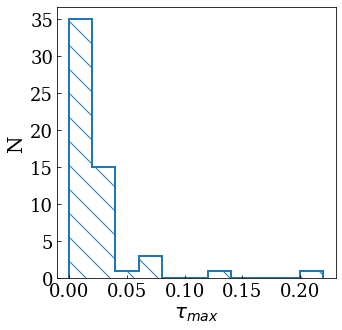

In [66]:
fig = plt.figure(figsize=(5.,5.))
plt.axes(frameon=False)
plt.xticks([])
plt.yticks([])

ax = fig.add_subplot(1,1,1)
data1 = tau
plt.hist(data1, bins=np.arange(0,0.23,0.02), histtype='step', color='C0', hatch='\\', linewidth=2)
plt.xticks(family='serif',size=18)
plt.yticks(family='serif',size=18)
#ax.set_ybound(0, 20)
ax.set_xlabel(r'$\tau_{max}$', size=20,family='serif')
ax.set_ylabel('N', size=20,family='serif')

plt.savefig('tau_max_hist_5sig.png', bbox_inches='tight', dpi=200)